In [1]:
#Import operating system 
import os

In [2]:
#Set working directory
data_dir = "C:/Users/Emily/Documents/Fall_2020/ML_DS/Sample_Sentinel"

In [3]:
#List folders in the working directory
os.listdir(data_dir)

['.ipynb_checkpoints',
 'Idrisi32.lo2',
 'Idrisi32.log',
 'L1C_T19TBG_A025748_20200527T154252.rst.aux.xml',
 'L1C_T19TBG_A025748_20200527T154252.tif',
 'Sample_Bing_1.png',
 'Sample_Bing_2.png',
 'Split1.png',
 'Split_1_Samples',
 'Split_Imagery.ipynb',
 'Testing_Data',
 'Training_Data']

In [4]:
#Set testing and training data folders to different variables
test_path = data_dir + '/Testing_Data/'
train_path = data_dir + '/Training_Data/'

In [5]:
#Check that is worked by calling the path name
test_path

'C:/Users/Emily/Documents/Fall_2020/ML_DS/Sample_Sentinel/Testing_Data/'

In [6]:
#Find the first training image within the "Solar" folder. The solar folder shows training images of the solar field
os.listdir(train_path + 'Solar')[0]

'Split1_54_06.png'

In [7]:
#Set the first training image to a variable
solar_cell = (train_path + 'Solar/' + 'Split1_54_06.png')

In [8]:
#Import matplotlib (library for plotting and displaying data)
import matplotlib.pyplot as plt
from matplotlib.image import imread

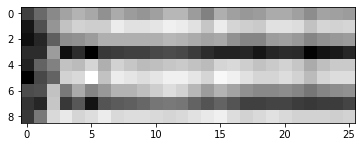

In [9]:
#Show the first image in the training 'Solar' folder
plt.imshow(imread(solar_cell), cmap='gray')

In [10]:
#Check if image is normalized or if brightness ranges from 0-255. Normalize if not. 
imread(solar_cell).max()

0.41960785

In [12]:
#Import Image Data Generator from Tensorflow. This function expands our training dataset by flipping and rotating images. Should produce a more robust model.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=180, width_shift_range = 0.1, height_shift_range= 0.1)

In [13]:
#Apply the image generator to the training data
#image_gen.flow_from_directory(train_path)

In [20]:
#Import tools to build model. 
#I am using a Sequential model which allows me to add layers in a custom order
from tensorflow.keras.models import Sequential
#Import specific types of layers I will use 1. Dense fully connected layer, Convlutional 2d layer, Max Pooling 2d Layer, and Flattening layer
#2D means we're looking at a greyscale image. 3d would be RGB
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten

In [56]:
#Initiate model object
model = Sequential()
'''
Convolutional layer

filer = the number of output filters in the convolution
kernel_size = specifying the height and width of the 2D convolution window
strides = specifying the strides of the convolution along the height and width
activation function = activation function to use

Pool layer 

pool_size = window size over which to take the maximum or average
padding =  "same" adds padding such that if the stride is 1, the output shape is the same as input shape

Flatten - turns the 2D image data into 1D vectors

Dense layer
Fully connected layer - for example, what TerrSet uses in MLP. 
In this case, you specify the number of nodes and the activation function.

'''

model.add(Conv2D(filters = 20, kernel_size = (9,9), strides = 2, activation = 'relu'))
model.add(AveragePooling2D(pool_size =(3,3), padding = 'same'))

model.add(Conv2D(filters = 10, kernel_size = (6,6), strides = 1, activation = 'relu'))
model.add(MaxPool2D(pool_size =(2,2), padding = 'same'))

model.add(Conv2D(filters = 10, kernel_size = (16,16), strides = 3, activation = 'relu'))
model.add(AveragePooling2D(pool_size =(4,4), padding = 'same'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))
'''
This line compiles the whole model.

loss = The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
optimizer = A function for reducing learning and momentum parameters as it trains
metrics = A metric is a function that is used to judge the performance of your model. Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model.
'''

model.compile(loss='binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [57]:
#Import EarlyStopping object so we limit overfitting
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
"""
Early stop

monitor = Quantity to be monitored. Val_loss cost function for your cross-validation (testing?) data
patience = Number of epochs with no improvement after which training will be stopped
"""

early_stop = EarlyStopping(monitor='val_loss', patience = 2)

In [59]:
batch_size = 4

In [60]:
#Apply image_generator to training data
train_image_gen = image_gen.flow_from_directory(train_path, color_mode='grayscale', shuffle = False, class_mode = 'binary')

Found 28 images belonging to 2 classes.


In [61]:
#Apply image_generator to testing data
test_image_gen = image_gen.flow_from_directory(test_path, color_mode='grayscale', batch_size = batch_size, shuffle = False, class_mode = 'binary')

Found 74 images belonging to 2 classes.


In [62]:
'''
Run the model. We use the generated image dataset to train for a maximum of 20 epochs. 
The generated testing data is used to measure the loss. It will stop based on the EarlyStopping parameters.
'''
results = model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks = [early_stop])

  ...
    to  
  ['...']
Train for 1 steps, validate for 19 steps
Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 1.9053 - accuracy: 0.5000 - val_loss: 11.3035 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 10.4438 - accuracy: 0.5000 - val_loss: 4.8835 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 4.5013 - accuracy: 0.5000 - val_loss: 1.1755 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 1.0884 - accuracy: 0.5000 - val_loss: 0.6843 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.6839 - accuracy: 0.5357 - val_loss: 0.6779 - val_accuracy: 0.5135
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.6749 - accuracy: 0.5000 - val_loss: 0.7199 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.7213 - accuracy: 0.5000 - val_loss: 0.6

In [63]:
#Predict the model outputs for the testing data
pred = model.predict(test_image_gen)

In [64]:
#Set a threshold for what is solar or not. In this case, anything with a probablity of >40% is considered solar. 
predictions = pred > 0.40

In [65]:
#Import confusion matrix
from sklearn.metrics import confusion_matrix

In [66]:
#Print classification results. Top left is (Not Solar, Not Solar) and the bottom right is (Solar, Solar)
print (confusion_matrix(test_image_gen.classes, predictions))

[[11 26]
 [ 4 33]]


In [67]:
#Flatten data so I can create a dataframe
#Import numpy
import numpy as np

#Retrieve file names an flatten to 1D array
names = test_image_gen.filenames
names = np.array(names)
names = np.ndarray.flatten(names)

#Retrieve True Classes and flatten to 1D array
classes = test_image_gen.classes
classes = np.array(classes)
classes = np.ndarray.flatten(classes)

#Retreive predictions
predictions = np.array(predictions)
predictions = np.ndarray.flatten(predictions)

In [68]:
#Create dictionary of column names and the data above
d = {'FileName': names, 'Classes': classes, 'Predictions': predictions}

#Convert dictionary into a dataframe
import pandas as pd
data = pd.DataFrame(data=d)
print (data)

                     FileName  Classes  Predictions
0   NotSolar\Split1_01_02.png        0         True
1   NotSolar\Split1_01_08.png        0         True
2   NotSolar\Split1_01_13.png        0         True
3   NotSolar\Split1_01_16.png        0         True
4   NotSolar\Split1_01_20.png        0         True
..                        ...      ...          ...
69     Solar\Split1_63_11.png        1         True
70     Solar\Split1_64_09.png        1         True
71     Solar\Split1_64_10.png        1         True
72     Solar\Split1_65_09.png        1         True
73     Solar\Split1_65_10.png        1         True

[74 rows x 3 columns]
